<a href="https://colab.research.google.com/github/aditya248/manhattan-property-sales-EDA/blob/main/BA780_Team3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessing sales price of Manhattan properties using data from 2015

## Problem: 
Our goal is to assess and visualize the relationship between sales price of a property in Manhattan and various features in the dataset that might impact it. We will be doing data munging and analysis in python along with visualizations using important python libraries. Examples of questions we will answer and visualize include:
* How the size, location and neighborhood relate to and impact the sales price of a property
* Additional relations will be studied for features like property taxes and year of built and visualize them using different python libraries</br>

## Data and its Source: 
### About the data:
Each row represents a property in Manhattan, each column contains properties's attributes described as below:
*   **Borough**: The name of the borough  in which the property is located
*   **Neighborhood**: Department of Finance assessors determine the neighborhood name while valuing properties
*   **Building Class Category**: To identify similar properties by broad usage(e.g. One Family  Homes)
*   **Tax Class**: There are four tax classes (Classes 1,2,3 and 4) based on the use of property:

Class1: Includes most residential property of up to three units

Class2: Includes all other property  that is primarily  residential , such as  cooperatives and condominiums

Class3: Includes property with equipment owned by a gas,telephone or electric company 

Class4: Includes all other properties such as offices,factories,garages etc.
*   **Block**: Sub-division of the borough on which real property is located.
*   **Lot**: Sub-division of tax block and represents property's unique location
*   **Address**: Street address of the property
*   **Zip code**: Property's postal code
*   **Residential units**: No. of residential units in a property
*   **Commercial units**: No. of commercial units in a property
*   **Total units**
*   **Land square feet**: Land area of the property listed
*   **Gross square feet**: Total area of all floors of a building,including the land area and the space within the buildings on the property
*   **Year built**: Year the structre on the property was built
*   **Sale price**: Price paid for the property
*   **Sales date**: Date when the propery was sold

### Source:
This dataset is available in open data platform provided by the Housing Development, City of New York</br>
https://data.cityofnewyork.us/Housing-Development/NYC-Calendar-Sales-Archive-/uzf5-f8n2

## Motivation:
Knowing about what all factors are related to property prices and being able to predict the sales price , would help:
1.   People who plan to buy a house so they can know the price range in the future, and then they can plan their finances well
2.   Property price predictions are also beneficial for property investors to know the trend of sales prices in a certain location.
3.   Helps in real estate efficiency


### Team3 Members:
Aditya Sinha,
Chinar Boolchandani,
Qianru Ai,
Niming Wang,
Mochi Zhang

## Data Overview and importing important libraries and packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy.stats import skewnorm

In [ ]:
# from google.colab import drive
 #drive.mount('/content/drive')

In [ ]:
# just for convinience, will delete after complition
df = pd.read_csv("https://raw.githubusercontent.com/aditya248/Loan-Prediction/main/Other-dataset/Manhattan_properties_2015.csv")
df.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,10009,1,0,1,"1,883","5,200",1900,1,A4,"$6,500,000",3/18/2015
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376,24,,C0,264 EAST 7TH STREET,,10009,3,0,3,"2,059","3,696",1900,1,C0,"$3,775,000",10/22/2015
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,,C0,243 EAST 7TH STREET,,10009,3,0,3,"2,381","3,084",1899,1,C0,"$2,900,000",6/24/2015
3,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1101,,R6,238 EAST 4TH STREET,-,10009,1,0,1,0,0,1955,1,R6,"$6,995,000",6/15/2015
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,,C1,326 EAST 4TH STREET,,10009,10,0,10,"2,204","8,625",1899,2,C1,"$20,000,000",11/17/2015


## Data cleaning and imputing

1) Cleaning the column names by :


*   Remove /n from column names
*   Making the case consistent across all columns
*   Replacing any empty string with NaN

In [ ]:
df.rename(columns=lambda x: x.lower(), inplace=True)
df.rename(columns=lambda x: x[:-1], inplace=True)

df.head()

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,10009,1,0,1,"1,883","5,200",1900,1,A4,"$6,500,000",3/18/2015
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376,24,,C0,264 EAST 7TH STREET,,10009,3,0,3,"2,059","3,696",1900,1,C0,"$3,775,000",10/22/2015
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,,C0,243 EAST 7TH STREET,,10009,3,0,3,"2,381","3,084",1899,1,C0,"$2,900,000",6/24/2015
3,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1101,,R6,238 EAST 4TH STREET,-,10009,1,0,1,0,0,1955,1,R6,"$6,995,000",6/15/2015
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,,C1,326 EAST 4TH STREET,,10009,10,0,10,"2,204","8,625",1899,2,C1,"$20,000,000",11/17/2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24989 entries, 0 to 24988
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         24989 non-null  int64 
 1   neighborhood                    24989 non-null  object
 2   building class category         24989 non-null  object
 3   tax class at present            24989 non-null  object
 4   block                           24989 non-null  int64 
 5   lot                             24989 non-null  int64 
 6   ease-ment                       24989 non-null  object
 7   building class at present       24989 non-null  object
 8   address                         24989 non-null  object
 9   apartment number                24989 non-null  object
 10  zip code                        24989 non-null  int64 
 11  residential units               24989 non-null  object
 12  commercial units                24989 non-null

In [ ]:
for col in df.columns.values.tolist():
  if(df[col].dtypes == "object"):
    df[col] = df[col].str.strip()

# Replace any empty string with nan
df = df.replace('', np.nan)  

2) Check for NULL values , which will be fixed by imputing:

In [ ]:
# Check for any null values
df.isna().sum()

borough                               0
neighborhood                          0
building class category               0
tax class at present                  3
block                                 0
lot                                   0
ease-ment                         24989
building class at present             3
address                               0
apartment number                  12780
zip code                              0
residential units                     0
commercial units                      0
total units                           0
land square feet                      0
gross square feet                     0
year built                            0
tax class at time of sale             0
building class at time of sale        0
sale price                            0
sale date                             0
dtype: int64

##Data Imputing:

In [ ]:
df['building class at present'] = df['building class at present'].fillna('Unknown')
df['tax class at present'] = df['tax class at present'].fillna('Unknown')

In [ ]:
df[(df['tax class at present'].isnull()) | (df['building class at present'].isnull())]

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date


3) Changing columns to correct datatypes based on their values:

In [ ]:
df["sale date"] = df["sale date"].apply(pd.to_datetime)
df["sale price"] = df["sale price"].replace('[\$,]', '', regex=True).astype(float)
df["total units"] = df["total units"].replace('[\,]', '', regex=True).astype(int)
df["land square feet"] = df["land square feet"].replace('[\,]', '', regex=True).astype(float)
df["gross square feet"] = df["gross square feet"].replace('[\,]', '', regex=True).astype(float)
df["residential units"] = df["residential units"].replace('[\,]', '', regex=True).astype(int)
df["tax class at time of sale"] = df["tax class at time of sale"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24989 entries, 0 to 24988
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         24989 non-null  int64         
 1   neighborhood                    24989 non-null  object        
 2   building class category         24989 non-null  object        
 3   tax class at present            24989 non-null  object        
 4   block                           24989 non-null  int64         
 5   lot                             24989 non-null  int64         
 6   ease-ment                       0 non-null      float64       
 7   building class at present       24989 non-null  object        
 8   address                         24989 non-null  object        
 9   apartment number                12209 non-null  object        
 10  zip code                        24989 non-null  int64         
 11  re

4) Dropping columns/rows with:
1.  Constat values, with Standard deviation 0
2.  2 rows that have "Unknown" neighborhoods
3.  5k rows have $0 sale price as they were transfer properties given from a parent to a child and not sold
4.  Apartment number which is very unique to each unit on property and we are not using in our analysis
4. Unknown Tax class is being excluded for our visualizations are analysis

In [ ]:
df = df.drop(['ease-ment'], 1)
df = df.drop(['borough'], 1)
dCol = ['apartment number']
df.drop(dCol, axis=1, inplace=True)
i = df[(df['neighborhood'] == 'MANHATTAN-UNKNOWN') ].index
df.drop(i,inplace=True)
df = df[df['sale price'] > 0]
df = df[df['zip code'] > 0]
j = df[(df['tax class at present'] == 'Unknown') ].index
df.drop(j,inplace=True)

In [ ]:
print(df.nunique())

neighborhood                         38
building class category              42
tax class at present                  8
block                              1385
lot                                1767
building class at present           118
address                           11246
zip code                             46
residential units                   102
commercial units                     50
total units                         114
land square feet                    857
gross square feet                  1169
year built                          137
tax class at time of sale             3
building class at time of sale      120
sale price                         6451
sale date                           298
dtype: int64


### Getting the latitude and longitude(not in our dataset) based on different zipcodes in the dataset:

In [ ]:
pip install pgeocode -q

In [ ]:
pip install folium -q

In [ ]:
import pgeocode

zip_code_list = list(df['zip code'])
zip_code_list = [str(x) for x in zip_code_list]

nomi = pgeocode.Nominatim('us')
zip_code_info = nomi.query_postal_code(zip_code_list)
zip_code_info = zip_code_info[["latitude", "longitude" ]]

In [ ]:
df["latitude"] = np.array(zip_code_info["latitude"])
df["longitude"] = np.array(zip_code_info["longitude"])

# **Exploratory Data Analysis**
Understanding how different features in the dataset impact sales price of any property in Manhattan area


##Target Variable : **Property Sale Price**
We are trying to predict the sales price of a property in Manhattan based on various demographic and other features in the dataset

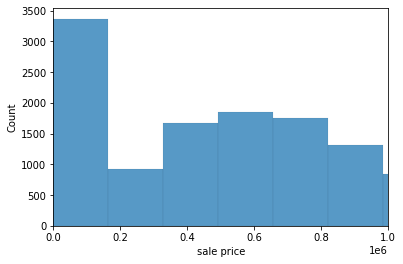

In [ ]:
df1=df[(df['sale price'] > 0) & (df['sale price'] < 116000000)]
sns.histplot(df1['sale price'],bins=700)
plt.xlim(0,1*(10**6));


**Observation:**

We can see around 3.5k properties in Manhattan were sold between $100k - $200k and only 1k properties were sold for around $800k - $1million.

##Categorical Variables:
This dataset has 6 categorical variables, each of them is analyzed below:



1.   Neighborhood  
2.   Building class at present and at the time of sale
3.   Tax Class at present and at the time of sale
4.   Address

1. **Neighborhood:**

Questions:

1.   Distribution of number of properties in various neighborhoods of Manhattan
2.   Which neighborhoods have the highest mean property sale prices
3.   Which neighborhood has largest properties
4.   Which neighborhood has high number of residential and commercial units

In [ ]:
#Total unique neighborhoods in dataset
df['neighborhood'].nunique()

15

Categorizing the neighborhoods based on their vicinity on Manhattan's geo map ( initial dataset had 38 neighborhoods, categorized them into 15 nieghborhoods):

In [ ]:
df.neighborhood.replace(['UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)','UPPER EAST SIDE (96-110)'], 'UPPER EAST SIDE', inplace=True)
df.neighborhood.replace(['UPPER WEST SIDE (59-79)', 'UPPER WEST SIDE (79-96)','UPPER WEST SIDE (96-116)'], 'UPPER WEST SIDE', inplace=True)
df.neighborhood.replace(['HARLEM-WEST', 'HARLEM-EAST','HARLEM-CENTRAL','WASHINGTON HEIGHTS UPPER','WASHINGTON HEIGHTS LOWER','INWOOD','MORNINGSIDE HEIGHTS'], 'HARLEM/WASHINGTON HEIGHTS', inplace=True)
df.neighborhood.replace(['MIDTOWN WEST', 'MIDTOWN EAST','MIDTOWN CBD','CLINTON','JAVITS CENTER'], 'MIDTOWN', inplace=True)
df.neighborhood.replace(['CHELSEA', 'FLATIRON'], 'CHELSEA', inplace=True)
df.neighborhood.replace(['GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST'], 'WEST VILLAGE', inplace=True)
df.neighborhood.replace(['SOHO', 'LITTLE ITALY'], 'SOHO-LITTLE ITALY', inplace=True)
df.neighborhood.replace(['ALPHABET CITY', 'GRAMERCY','EAST VILLAGE','KIPS BAY'], 'EAST VILLAGE', inplace=True)
df.neighborhood.replace(['CHINATOWN', 'CIVIC CENTER','FASHION','SOUTHBRIDGE'], 'CHINATOWN', inplace=True)


1. Properties in each neighborhood of Manhattan:

In [ ]:
df['neighborhood'].value_counts().to_frame().head()

,neighborhood
MIDTOWN,5540
UPPER EAST SIDE,3464
UPPER WEST SIDE,2664
HARLEM/WASHINGTON HEIGHTS,1605
CHELSEA,1127


Visualizing the distribution of neighborhood in Manhattan properties dataset:

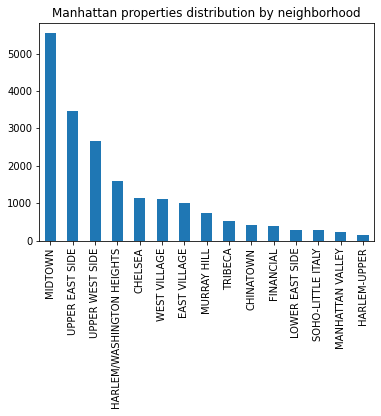

In [ ]:
df['neighborhood'].value_counts().plot.bar()
plt.title("Manhattan properties distribution by neighborhood");

2. Wealthiest neighbourhoods in Manhattan with property sales prices being the highest: --> Aditya please add the heatmap here so it shows which neighborhood has the highest sale prices

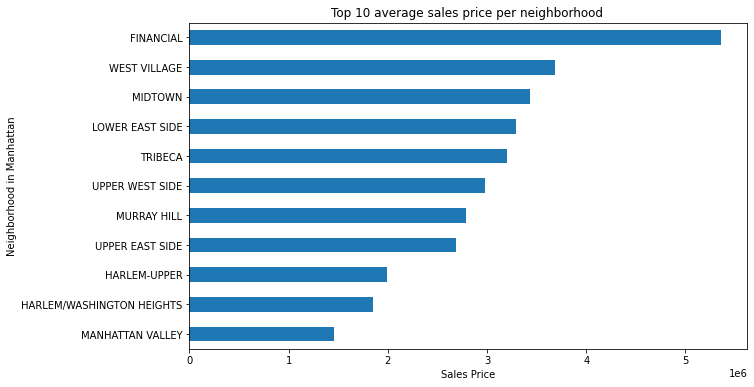

In [ ]:
# this graph I can remove once we have a heatmap in place
plt.figure(figsize=(10,6))
df['sale price'].groupby(df['neighborhood']).mean().sort_values()[:11].plot.barh()
plt.title('Top 10 average sales price per neighborhood ')
plt.xlabel("Sales Price")
plt.ylabel("Neighborhood in Manhattan");

**Observation:**

We can see "Financial" neighborhood has the highest average sales price for properties in Manhattan that were sold in 2015,followed by "West Village".

3. Which neighborhood has largest properties( in terms of sq feet) sold in Manhattan:

We can see that land square feet and sales price are positively correlated.


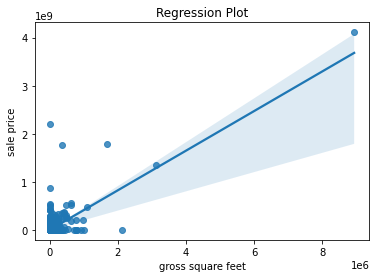

In [ ]:
sns.regplot(x=df['gross square feet'], y=df['sale price'])
plt.title("Regression Plot")
print("We can see that land square feet and sales price are positively correlated.")

4. Which neighborhood has highest residential and which has highest commercial units in their properties?

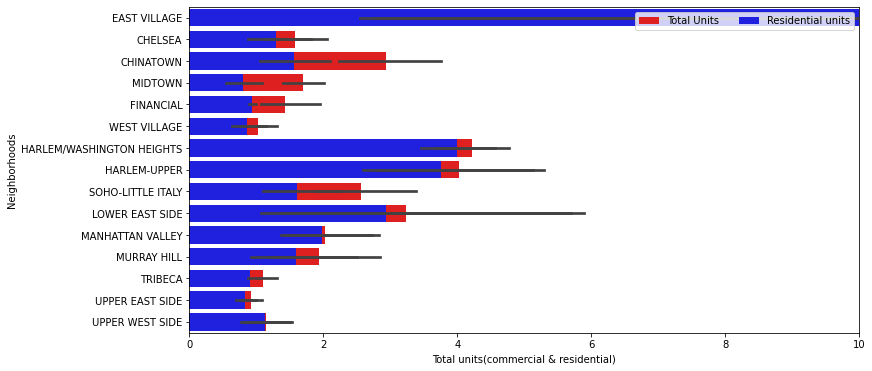

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
s1 = sns.barplot(x = 'total units', y = 'neighborhood', data = df, color = 'red',label='Total Units')

s2 = sns.barplot(x = 'residential units', y = 'neighborhood', data = df, color = 'blue',label="Residential units")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="Neighborhoods",
       xlabel="Total units(commercial & residential)");

**Observation:**

From above barplot we can see "Harlem and Washington Heights" have the highest total units with most units being residential. "Chinatown" seems to have most commercial units amongst other neighborhoods"

**2. Building Class**

Questions:
1.   Distribution of properties sold in Manhattan w.r.t building class category
2.   Properties belonging to which building class were sold for the highest price in Manhattan in 2015

1. Distribution of building class category in properties sold in 2015:

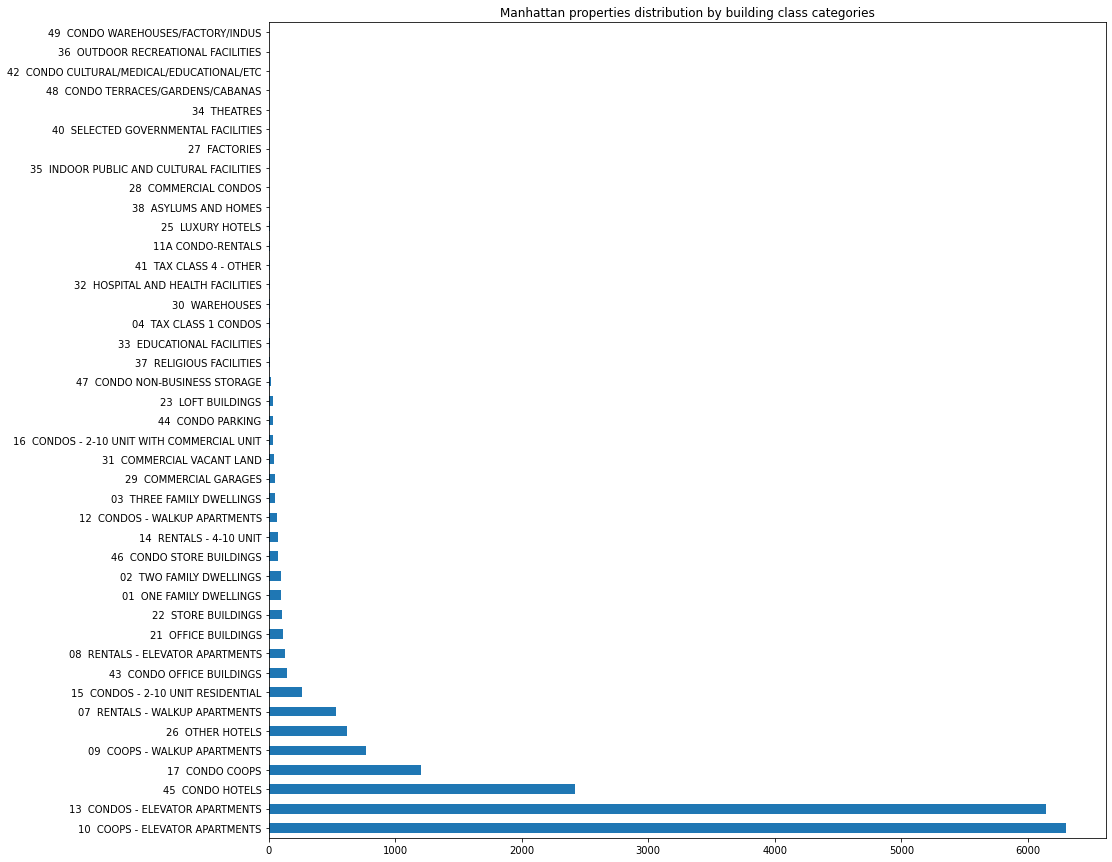

In [ ]:
plt.figure(figsize=(15,15))
df['building class category'].value_counts().plot.barh()
plt.title("Manhattan properties distribution by building class categories");

2. Average sales price of properties sold per building class category:

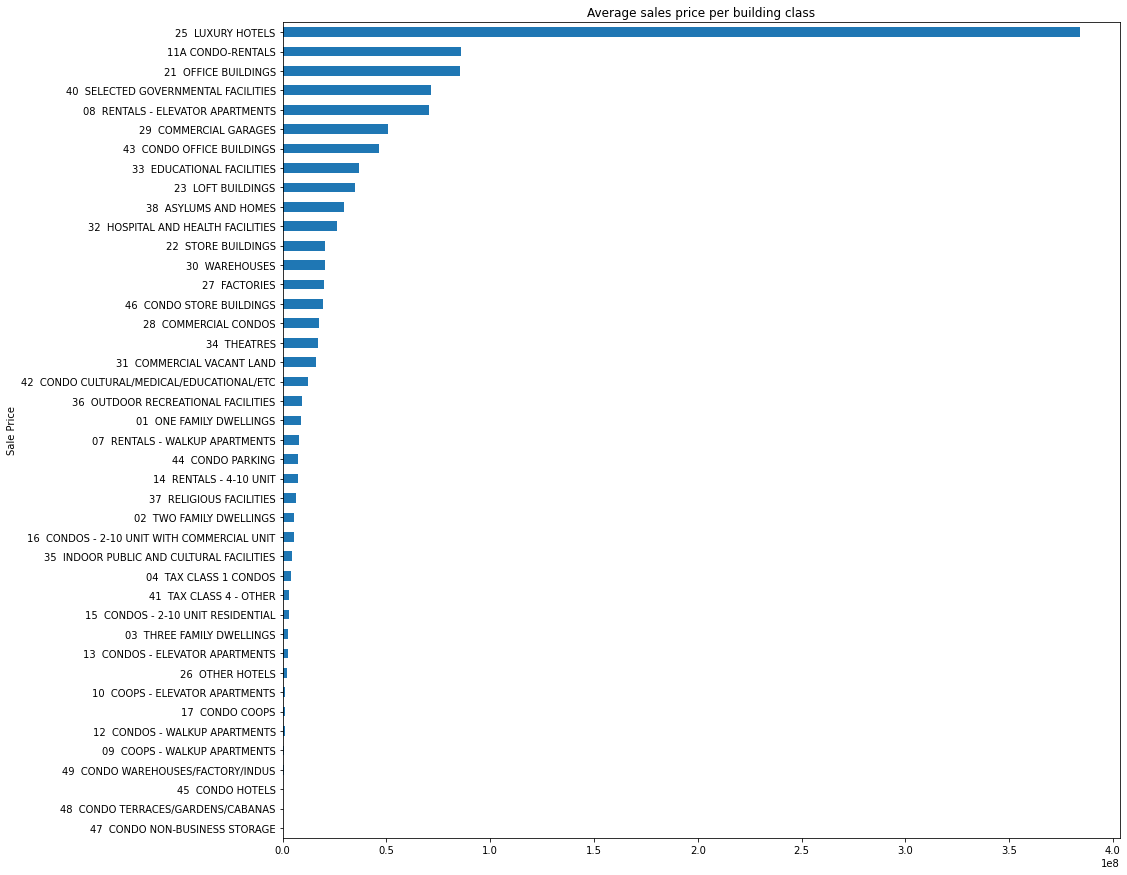

In [ ]:
plt.figure(figsize=(15,15))
df['sale price'].groupby(df['building class category']).mean().sort_values().plot.barh()
plt.ylabel("Sale Price")
plt.title('Average sales price per building class');

**Observation:**
Above plot shows that "Luxury Hotels", "Condo Buildings", "Offices" are the building classes with highest average sales prices in 2015.

**3. Tax Class**

Questions:
1. Distribution of Tax class among properties in Manhattan
2. Does tax class impact the sale price of a property
3. How many properties had a change in Tax class from sale date to present

1. Distribution of Tax class in neighborhood

In [ ]:
df['tax class at present'].value_counts()

2     14630
4      3737
2C      593
1       248
2B      197
2A      105
1C       11
1A        2
Name: tax class at present, dtype: int64

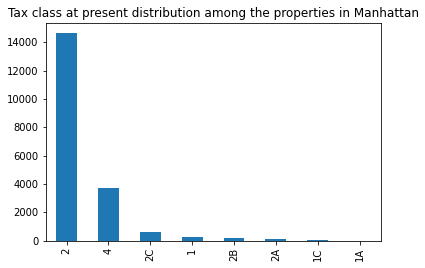

In [ ]:
df['tax class at present'].value_counts().plot.bar()
plt.title("Tax class at present distribution among the properties in Manhattan");

In [ ]:
# extract columns
tax_neighborhood = df[['neighborhood','tax class at present']]
tax_neighborhood.head()

,neighborhood,tax class at present
0,EAST VILLAGE,1
1,EAST VILLAGE,1
2,EAST VILLAGE,1
3,EAST VILLAGE,1C
4,EAST VILLAGE,2B


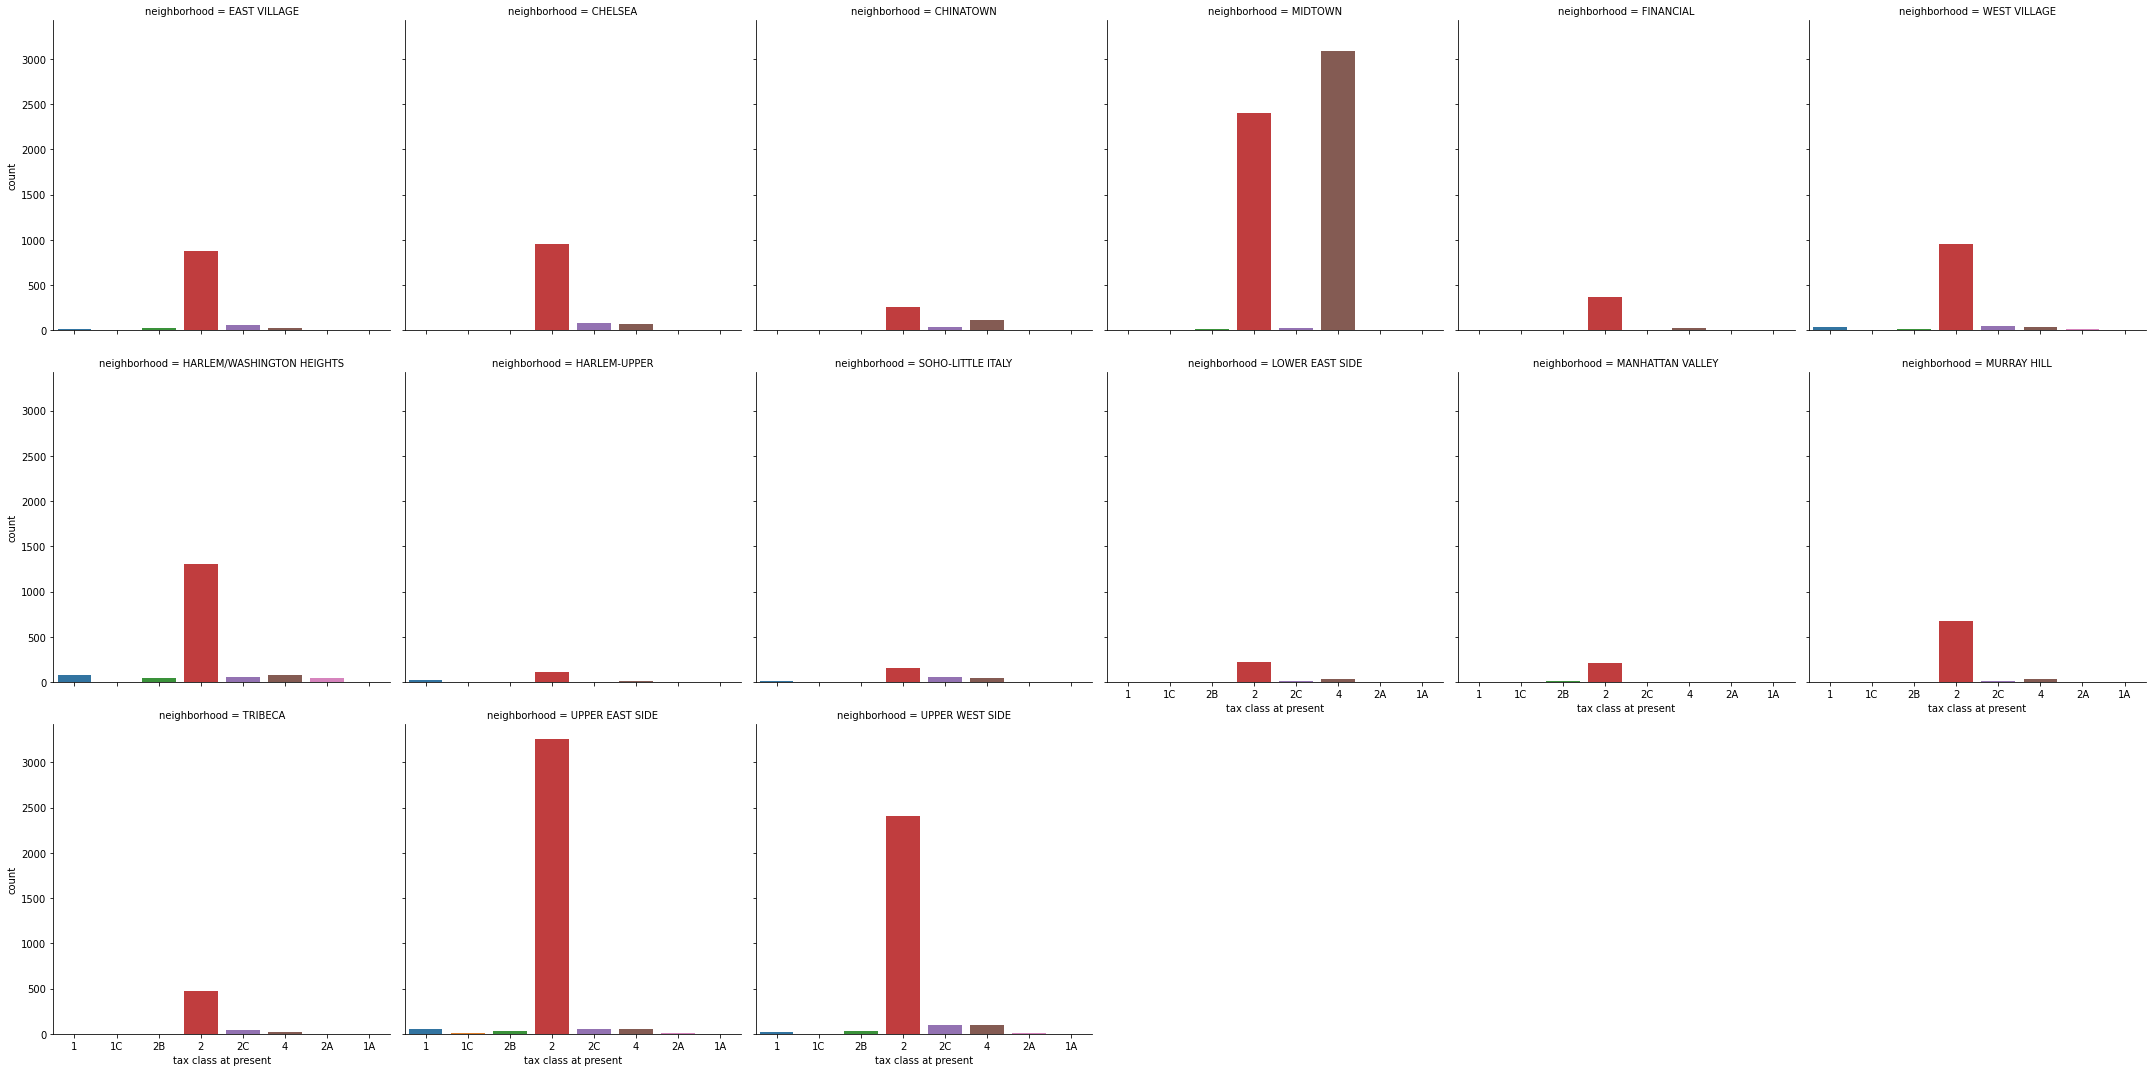

In [ ]:
sns.catplot(x='tax class at present',
            data=tax_neighborhood,
            kind='count',
            col='neighborhood',
            col_wrap = 6
            );

2. Sales distribution of different Tax class

In [ ]:
tax_sales = df[['tax class at present','sale price']]
#tax_sales = tax_sales.rename(columns={'tax class at present':'tax_class'})
tax_sales.head()

,tax class at present,sale price
0,1,6500000.0
1,1,3775000.0
2,1,2900000.0
3,1C,6995000.0
4,2B,20000000.0


In [ ]:
tax_sales = tax_sales.groupby('tax class at present').agg({'sale price':'mean'})
# delete index
tax_sales = tax_sales.rename(columns={'sale price':'sale price mean'})
tax_sales.reset_index(inplace=True)
tax_sales.head()

,tax class at present,sale price mean
0,1,6.244542e+06
1,1A,3.500050e+05
2,1C,4.648645e+06
3,2,2.536341e+06
4,2A,6.638357e+06


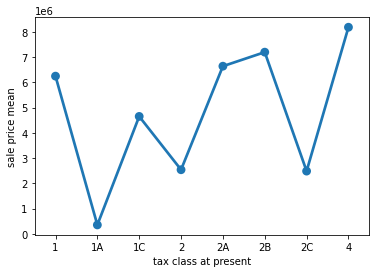

In [ ]:
# Plot
sns.pointplot(x='tax class at present',y='sale price mean',data=tax_sales)
plt.title("Average sale price distribution with tax class at present");

3. Analyzing the change in Tax class at present vs. at time of sale and how the change in Tax class is associated with change in sales price:

Distribution of Tax class at the time of sale amongst all the properties in Manhattan:

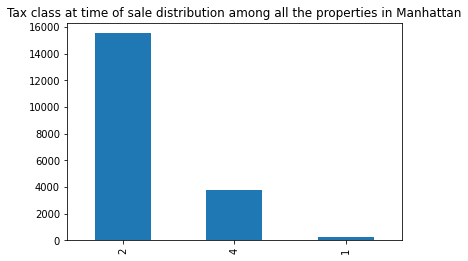

In [ ]:
df['tax class at time of sale'].value_counts().plot.bar()
plt.title("Tax class at time of sale distribution among all the properties in Manhattan");

In [ ]:
tax_tax = df[['tax class at present','tax class at time of sale']]
tax_tax = tax_tax.dropna()
tax_tax.head()

,tax class at present,tax class at time of sale
0,1,1
1,1,1
2,1,1
3,1C,1
4,2B,2


<Figure size 864x432 with 0 Axes>

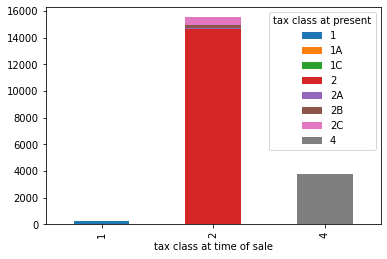

In [ ]:
# how about this one?
# no idea why the label is soo large. will fix this later.
plt.figure(figsize=(12,6))
tax_stacked = df.groupby(['tax class at time of sale', 'tax class at present']).size().reset_index().pivot(columns='tax class at present', index='tax class at time of sale', values=0)
tax_stacked.plot(kind='bar', stacked=True);

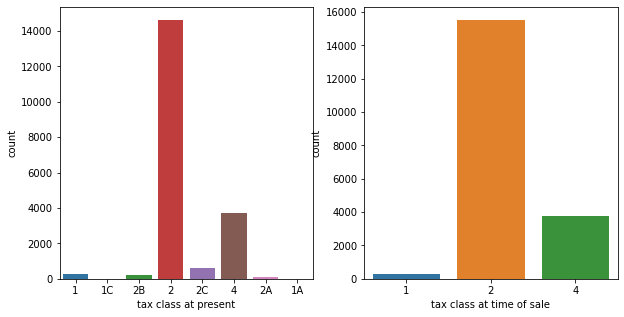

In [ ]:
# two other options --> Liked this one better
fig, ax_arr = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='tax class at present', data=tax_tax,ax = ax_arr[0])
sns.countplot(x='tax class at time of sale',data=tax_tax,ax = ax_arr[1]);

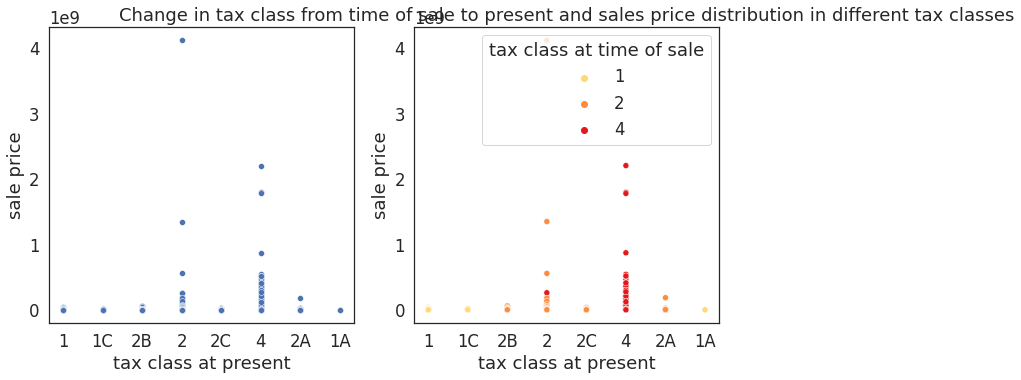

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5,style='white')
fig1 = fig.add_subplot(221); 
sns.scatterplot(x = df['tax class at present'], y = df['sale price'], palette= 'YlOrRd')

fig2 = fig.add_subplot(222); 
sns.scatterplot(x = df['tax class at present'], y = df['sale price'], hue=df['tax class at time of sale'], palette= 'YlOrRd')
plt.title("Change in tax class from time of sale to present and sales price distribution in different tax classes");

##Numerical Variables:
This dataset has 7 numerical variables, each of them is analyzed below:
1.   Zip code  
2.   Land square feet and gross square feet
3.   Residential and commercial units
4.   Year of built
5.   Sale date



**1. Zip code**:

Map analysis to find out the zip code with the highest average sale price in Manhattan.


In [87]:
# Neighboorhood and zip code
neighborhood_zip = df[['zip code','neighborhood']]
neighborhood_zip.drop_duplicates('zip code', inplace=True)

df_zip =  df.groupby(["zip code"]).agg({'sale price':"mean", 'latitude':'mean', "longitude" : 'mean'})
df_zip = df_zip.reset_index()

df_zip = pd.merge(df_zip, neighborhood_zip, how='left', on='zip code')
df_zip['ZIP'] = df_zip['zip code'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
print(df_zip.head())

   zip code    sale price  latitude  longitude     neighborhood    ZIP
0     10001  8.861737e+06   40.7484   -73.9967        CHINATOWN  10001
1     10002  3.511681e+06   40.7152   -73.9877  LOWER EAST SIDE  10002
2     10003  2.655826e+06   40.7313   -73.9892     EAST VILLAGE  10003
3     10004  2.222425e+06   40.7143   -74.0060        FINANCIAL  10004
4     10005  1.049661e+07   40.7056   -74.0083        FINANCIAL  10005


In [90]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

map = folium.Map([40.7831,-73.9712],zoom_start=12, tiles='stamentoner')
map.choropleth(geo_data="https://raw.githubusercontent.com/aditya248/manhattan-property-sales-EDA/main/manhattan-zip-code-tabulation-areas-polygons.geojson", # I found this NYC zipcode boundaries by googling 
             data=df_zip, # my dataset
             columns=['ZIP', 'sale price'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='YlGnBu', fill_opacity=0.8, line_opacity=.5,
             legend_name='SALE PRICE')

marker_cluster = MarkerCluster().add_to(map) # create marker clusters

for i,row in df_zip.iterrows():
     location = [row['latitude'],row['longitude']]
     tooltip = "Zipcode:{}<br> Neighborhood: {} <br> Click for more".format(row["ZIP"], row["neighborhood"])
     folium.Marker(location, 
                  popup="""<i>Mean sales price: </i> <br> <b>${}</b> <br>""".format(round(row['sale price'],2)),
                   tooltip=tooltip).add_to(marker_cluster)
 
map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


**Observation:**
Zipcode 10009 in East Village neighborhood has the highest mean sales price in Manhattan.

**2. Land square feet and Gross square feet:**

**3. Residential and commercial units** --> Aditya could you check if these plots make sense, if we need to adjust scales, 0 residential units are for diff category of building classes but when i remove that it looks more weird

Questions:


1.   What is the number of residential and commercial units with highest sale prices?
2.   What is the total number of units with highest sale prices?
3.   Which neighborhoods have higher residential and which have higher commercial units?



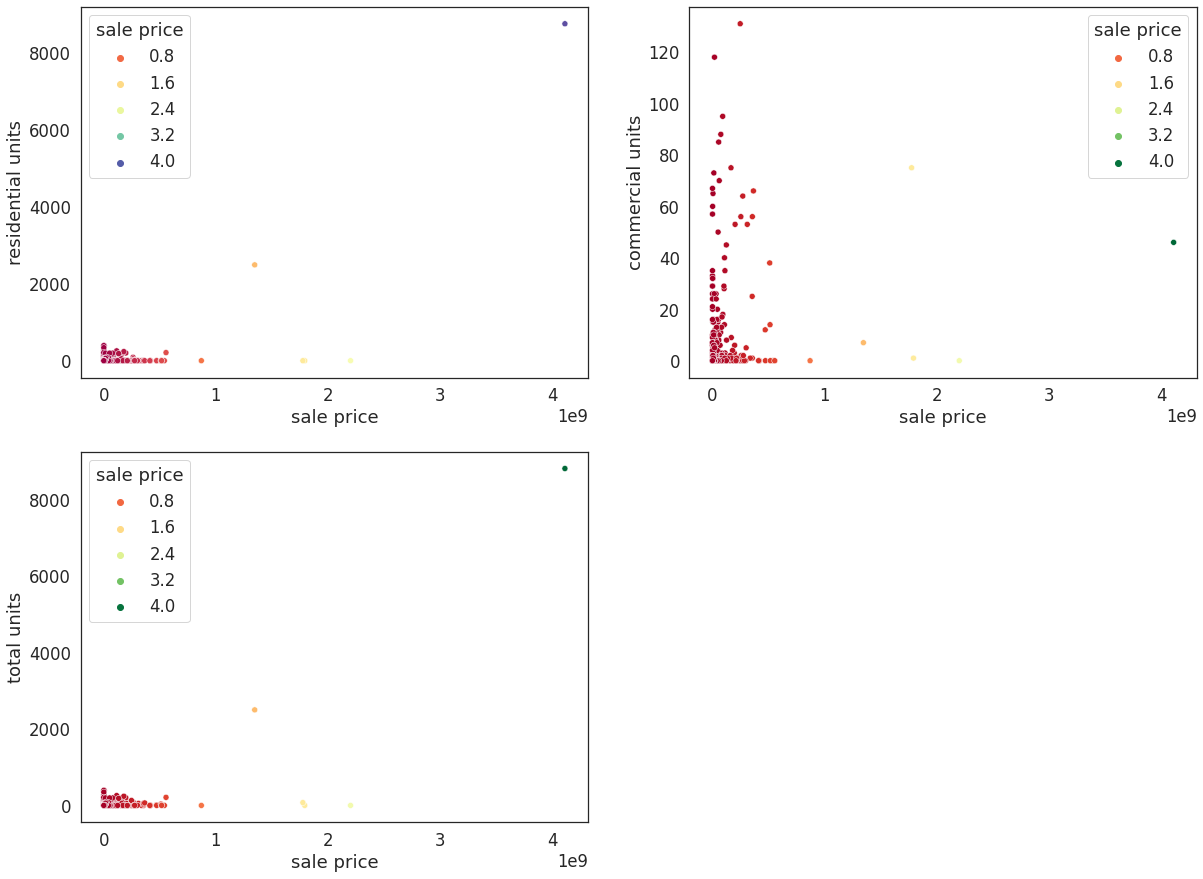

In [ ]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5,style='white')

#removing outliers for better visualization
df = df.drop(df[(df['residential units']<1) & (df['residential units']>9000) & (df['sale price']>1000000000)].index)
df = df.drop(df[(df['commercial units']<1) & (df['commercial units']>9000) & (df['sale price']>1000000000)].index)
df = df.drop(df[(df['total units']<1) & (df['total units']>9000) & (df['sale price']>1000000000)].index)

fig1 = fig.add_subplot(221); 
sns.scatterplot(data=df,y ='residential units', x = 'sale price',palette= 'Spectral',hue=df['sale price'])
fig2 = fig.add_subplot(222); 
sns.scatterplot(y = df['commercial units'], x = df['sale price'], palette= 'RdYlGn',hue=df['sale price'])
fig3 = fig.add_subplot(223); 
sns.scatterplot(y = df['total units'], x = df['sale price'], palette= 'RdYlGn',hue=df['sale price']);

**Observation:**
For most properties as the number of residential or commercial units or total units is increasing the sales price is more, with the exceptions of few properties like "Luxury Hotels","Stores","offices", "Hospitals" etc. which have 0 total units but are highly priced.

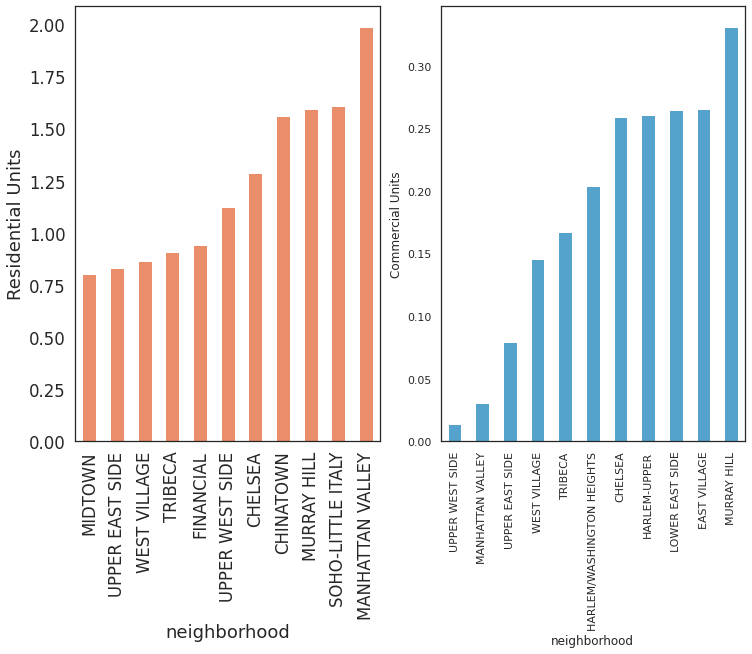

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.set(palette="flare",style='white')

df['residential units'].groupby(df['neighborhood']).mean().sort_values()[:11].plot.bar()
#sns.barplot(x="neighborhood", y="residential units", data=df, estimator=sum, ci=None)
plt.ylabel('Residential Units')

plt.subplot(1, 2, 2)
sns.set(palette="icefire",style='white')
df['commercial units'].groupby(df['neighborhood']).mean().sort_values()[:11].plot.bar()
plt.ylabel('Commercial Units');

**Observation:**

We can see Mahattan Valley has the highest residential units whereas Murray Hill has highest commercial units.

**4. Year of property built**

Questions:
1.   Which year were most of the properties that are being sold built in Manhattan?
2.   Does the year of build impact sales price of that property?
1.   Is the size of any property related to the year of built, like in 90s  bigger properties were built but with population increasing over the years property sizes decreased ?

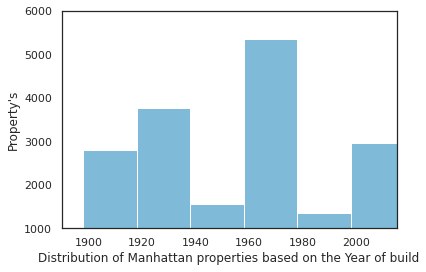

In [ ]:
sns.histplot(df[df['year built']!=0]['year built'],bins=20,binwidth=20);
plt.ylabel("Property's")
plt.xlabel("Distribution of Manhattan properties based on the Year of build")
plt.ylim(1000,6000)
plt.xlim(1890,2015);

**Observation:**

Most properties sold in 2015 in Manhattan were built between 1960-1980 (35-55 year old properties being sold). Very less properties built in 1980-2000 were sold in 2015.

**5. Sale date**

Question:
1.   Which month in 2015 had the highest sale prices? This could show the real estate prices going up, could be related to economic or social changes and help people decide when to buy or sell a property:

In [ ]:
#Extracting Month from sale date and creating a new column in df
df['month of sale'] = df['sale date'].dt.strftime('%b')
df.sort_values(by='sale date',inplace=True)

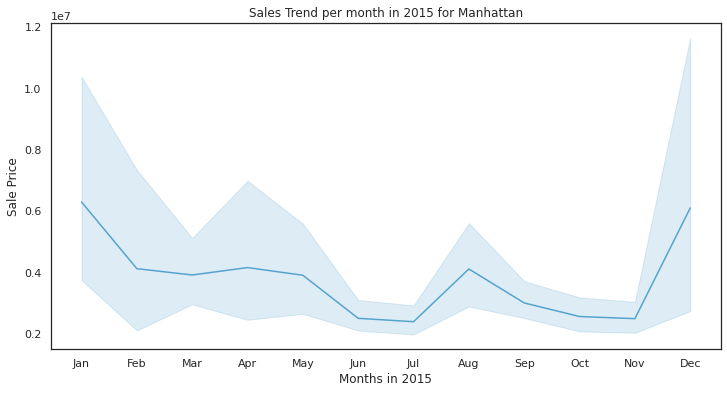

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month of sale',y='sale price',data=df,sort=True)
plt.title('Sales Trend per month in 2015 for Manhattan')
plt.ylabel('Sale Price')
plt.xlabel('Months in 2015')
plt.show();

**Observation:**

Above lineplot shows highest sale prices were from Jan-Feb 2015 and decreased thereafter, with slight increase during Aug-Sep2015.

2. Sale trend by month for top 5 neighborhoods with highest sale prices:

In [ ]:
df1['']=df['sale price'].groupby(df['neighborhood']).mean().sort_values()[:5]

In [ ]:
top5_neighborhoods=['MANHATTAN VALLEY','UPPER EAST SIDE','MURRAY HILL','HARLEM-UPPER','HARLEM/WASHINGTON HEIGHTS']
df1= df[df['neighborhood'].isin(top10_neighborhoods)]

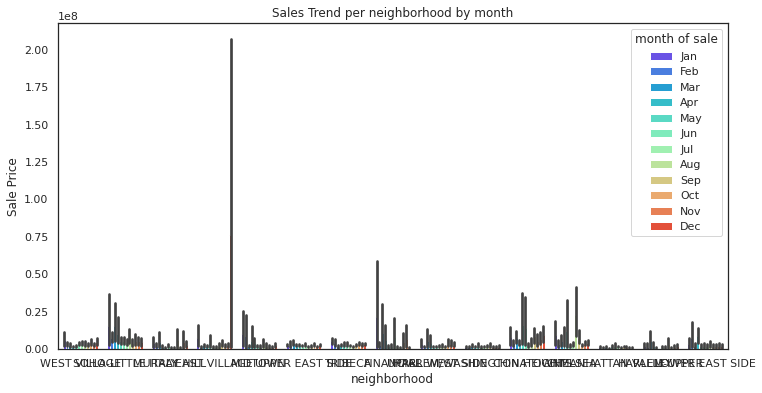

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='neighborhood', y='sale price', hue='month of sale', data=df1, palette='rainbow');
plt.title('Sales Trend by month for top 5 neighborhoods with highest sale price')
plt.ylabel('Sale Price')
plt.xlabel('Top 5 neighborhoods')
plt.ylim(50000,15000000)
plt.show();

**Observation:**

Above plot shows that March, Sept and November are the months where Sale prices are the highest for top neighborhoods in Manhattan during 2015.

Correlation between different features:

In [ ]:
plt.figure(figsize=(12,6))
corr_df=df.corr()
heatmap_df=corr_df.drop(['block','lot','zip code']).drop(['block','lot','zip code'],axis=1)
sns.heatmap(heatmap_df,square=True, cmap='RdYlGn');

NameError: ignored

**Observations:**

The features that show high positive correlation (of about 0.7)with sale price are : 
1.   Number of residential and total units
2.   Land square and gross square feet

The features with less positive correlation are:
1.   Year built (corr = 0.1)
2.   Commercial units (corr= 0.3)

#**Conclusions about the important variables and relationships from our EDA:**